## Quien sobrevivio el accidente del Titanic?

#### Actividad evaluativa 5 
Profesor Alfonso Cervantes Barragán - 14-10-2020

### Descripción del contexto.

En esta actividad el estudiante debera realizar un análisis exploratorio de Datos (EDA) del dataset *titanic.csv*, que contiene información sobre los pasajeros del accidente del Barco "Titanic".

La descripción de las columnas del dataset es la siguiente:

|Columna |	Descripción |  
|--------|--------------|
|Survived	| Sobrevivio? 0=No, 1=Si |   
|Pclass | Ticket class: 1=1st, 2=2nd, 3=3rd|
|sex    | genero del pasajero |
|Age    | Edad del pasajero. En años |
|SibSp  | número de hermanos en el Titatic |
|parch  | Número de padres/hijos en el Titatic |
|ticket | número del tiquete  |
|Fare   | Tarija del pasajero (dólares)  |
|cabin  | número de cabina |
|Embarked | En que puerdo enbarco: C=Cherbourg, Q=Queenstown, S=Southampton |



#### Entregable

El estudiante debera entregar un documento con extensión *ipynb* mediante el taller "Quinta Evaluación " que se encuentra en el curso virtual Informatica III en el plataforma Sergio Virtual


#### Plazo

El plazo de entrega sera hasta el domingo, 18 de octubre a las 11:30 p.m. En el aula del curso en la plataforma Sergio Virtual estará disponible un taller en el cual deberan subir el archivo .ipynb (Jupyter notebook) con todo el código requerido. 

No esta permitido resolver los ejercicios a mano ni ingresar la respuesta sin que haya un código que lo respalde.

#### Donde puedo trabajar?

Este ejercicio se puede realizar en el entorno virtual creado con base en el repositorio github.com/alfonsocerv/datascience en la carpeta /ejericicio/caso11.

#### Criterios de evaluación

1. Todo el código requerido debe estar presente. Cada ejercicio debe tener su respectiva respuesta.
2. No pueden haber errores que se generen al ejecutar el código.
3. El código debe cumplir con las especificaciones de cada ejercicio.

### Ejercicio 1

Importa las librerias pandas, numpy y matplotlib

#### Respuesta

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 2

Cargar el dataset *titanic.csv* y almacenarlo en la variable *datat*. Muestre los primeros 5 registros.

#### Respuesta

In [4]:
datat = pd.read_csv("titanic.csv")
datat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Ejercicio 3

De acuerdo con la descripción de los valores que ocupan cada columna presentada previamente, determine cuales de las variables (=las columnas) son categóricas?. 

Ingrese su respuesta como celda de texto aquí en el documento a continuación

#### Respuesta

passergerId, survived, Pclass, Sex, Embarket

### Ejercicio 4

Determine el porcentaje de mujeres y hombres que estuvieron en el Titanic

#### Respuesta

In [11]:
datat["Sex"].value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

### Ejercicio 5

Determine la edad promedio de los hombres y mujeres

#### Respuesta

In [12]:
datat[["Sex","Age"]].groupby(["Sex"]).mean()

,Age
Sex,
female,27.915709
male,30.726645


### Ejercicio 6

Agrupe los registros según el genero y muestre todas las estadísticas básicas relacionadas entre hombres y mujeres

#### Respuesta

In [13]:
datat[["Sex","Age"]].groupby(["Sex"]).describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0

### Ejercicio 7

Escriba un código que determine el rango de edad de los hombres.

#### Respuesta

In [19]:
hombremax=datat[datat["Sex"] == "male"]["Age"].max()
hombremin = datat[datat["Sex"] == "female"]["Age"].min()
rango_ = hombremax - hombremin
print("El rango de edad de los hombres es ", rango_)

El rango de edad de los hombres es  79.25


### Ejercicio 8

Determine si en primera clase se embarcaron más mujeres o hombres. Para resolver esto, agrupe los datos según la clase del tiquete y el género. Una vez lo haya hecho aplique el método count()

#### Respuesta

In [22]:
datat[["Pclass","Sex","Age"]].groupby(["Pclass","Sex"]).count()

Age
Pclass Sex        
1      female   85
       male    101
2      female   74
       male     99
3      female  102
       male    253

En primer clase se embarcaron más hombres (101) que mujeres (85)

### Ejercicio 9

Determine que porcentaje de pasajeros sobrevivio al accidente del Titanic

#### Respuesta

In [24]:
datat["Survived"].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

El 61.6% de los pasajeros no sobrevivio al accidente del Titanic.

### Ejercicio 10

Determine cuántos de los sobrevivientes eran mujeres y cuántos hombres?

#### Respuesta

In [25]:
datat[["Survived","Sex","Age"]].groupby(["Survived","Sex"]).count()

Age
Survived Sex        
0        female   64
         male    360
1        female  197
         male     93

197 pasajeros que sobrevivieron al Titanic eran mujeres, y sólo 93 eran hombres.

### Ejercicio 11

Determine cuántas de las mujeres que sobrevivieron al Titanic tenian más de dos hermanos abordo?

#### Respuesta

In [29]:
# Mujeres que sobrevivieron al titanic
dms = datat[(datat["Survived"] == 1) & (datat["Sex"] == "female")]
# mujeres que sobrevivieron al titanic con más de dos hermanos abordo.
mujeres_2_hermanos = dms[dms["SibSp"] > 2].shape
print("El número de mujeres que sobreivierion al Titanic con más de 2 hermanos son ",mujeres_2_hermanos[0])

El número de mujeres que sobreivierion al Titanic con más de 2 hermanos son  6


### Ejercicio 12

Determine el número de mujeres que se embarcaron en Queenstown (Q). Utilice el método groupby. Agrupe según las variables *Embarked* y *Sex*

#### Respuesta

In [30]:
datat[["Embarked","Sex","Age"]].groupby(["Embarked","Sex"]).count()

Age
Embarked Sex        
C        female   61
         male     69
Q        female   12
         male     16
S        female  186
         male    368

### Ejercicio 13

Cuál fue la tarifa máxima que se pago en primera clase?.

#### Respuesta

In [32]:
datat[["Pclass","Fare"]].groupby(["Pclass"]).max()

,Fare
Pclass,
1,512.3292
2,73.5000
3,69.5500


### Ejercicio 14

Cuál fue la tarifa máxima que pago en segunda clase una pasajera femenina?.

#### Respuesta

In [33]:
datat[["Pclass","Sex","Fare"]].groupby(["Pclass","Sex"]).max()

Fare
Pclass Sex             
1      female  512.3292
       male    512.3292
2      female   65.0000
       male     73.5000
3      female   69.5500
       male     69.5500

### Ejercicio 15

Cuál fue la tarifa máxima que pago en segunda clase una pasajera femenina que se embarco en Cherbourg (C)?.

#### Respuesta

In [34]:
datat[["Pclass","Sex","Embarked","Fare"]].groupby(["Pclass","Sex","Embarked"]).max()

Fare
Pclass Sex    Embarked          
1      female C         512.3292
              Q          90.0000
              S         263.0000
       male   C         512.3292
              Q          90.0000
              S         263.0000
2      female C          41.5792
              Q          12.3500
              S          65.0000
       male   C          41.5792
              Q          12.3500
              S          73.5000
3      female C          22.3583
              Q          29.1250
              S          69.5500
       male   C          21.6792
              Q          29.1250
              S          69.5500

### Ejercicio 16

Escriba un código de presente un histograma de las edades de los pasajeros, usando 50 bins con 15 pulgadas de largo y 8 de altura.

#### Respuesta

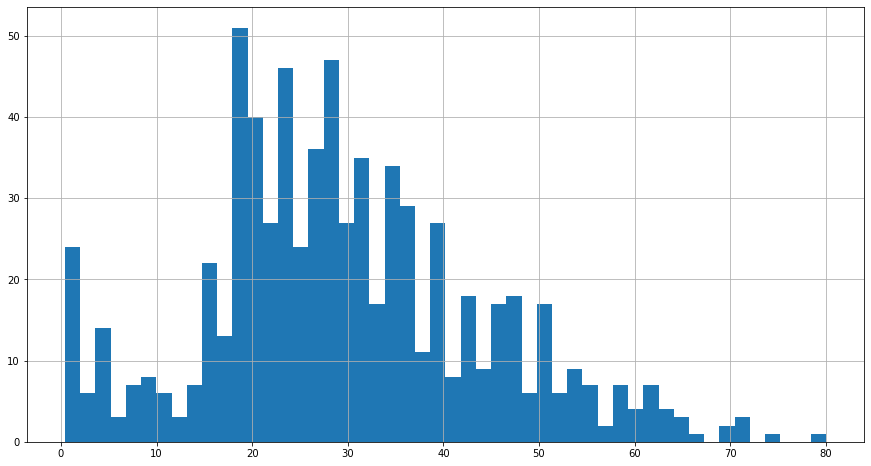

In [35]:
datat["Age"].hist(bins=50, figsize=(15,8))